<a href="https://colab.research.google.com/github/Rishabh672003/Learning-machine-learning/blob/main/jupyter-notebooks/Facial-emoion-recognition-2013.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization


In [49]:
!wget https://github.com/Iliescu-Dorin/FaceExpressionEnsemble/raw/main/Datasets/Fer2013/fer2013.rar
!unrar x /content/fer2013.rar

--2024-01-20 15:16:55--  https://github.com/Iliescu-Dorin/FaceExpressionEnsemble/raw/main/Datasets/Fer2013/fer2013.rar
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Iliescu-Dorin/FaceExpressionEnsemble/main/Datasets/Fer2013/fer2013.rar [following]
--2024-01-20 15:16:56--  https://raw.githubusercontent.com/Iliescu-Dorin/FaceExpressionEnsemble/main/Datasets/Fer2013/fer2013.rar
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 89940611 (86M) [application/octet-stream]
Saving to: ‘fer2013.rar.1’

fer2013.rar.1       100%[===================>]  85.77M   271MB/s    in 0.3s    

2024-01-20 15:16:56 (27

In [50]:
data = pd.read_csv('fer2013.csv')

In [51]:
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [53]:
data['pixels'] = data['pixels'].apply(lambda x: np.fromstring(x ,dtype='float',sep=" "))

In [54]:
data['pixels'] = data['pixels'].apply(lambda x: (np.array(x)).reshape(48,48))

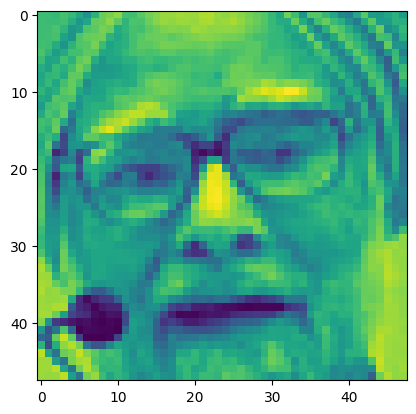

In [55]:
import matplotlib.pyplot as plt
plt.imshow(data['pixels'][1])

In [56]:
data.drop(columns=['Usage'],inplace = True)

In [57]:
X = data['pixels'].apply(np.array).values
y = data['emotion'].apply(np.array).values

2

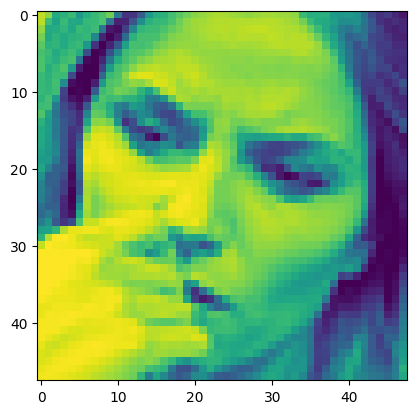

In [58]:
plt.imshow(data['pixels'][2])
y[2]

In [59]:
X = np.stack(X)
X.shape

(35887, 48, 48)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [65]:
X_test.shape, y_test.shape

((8972, 48, 48), (8972,))

In [66]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [67]:
X_train.shape, X_test.shape

((26915, 48, 48, 1), (8972, 48, 48, 1))

In [68]:
y_train.shape, y_test.shape

((26915,), (8972,))

In [69]:
K = 7

In [77]:
i = Input(shape=X_train[0].shape)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)

# x = GlobalMaxPooling2D()(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [78]:
sgd = tf.keras.optimizers.experimental.SGD(
    learning_rate=0.01,
    momentum=0.9,
    nesterov=True,
)

model.compile(optimizer = sgd,
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'],)

In [79]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', verbose = 1, patience=2, restore_best_weights=True)
r = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    callbacks=[callback],
    epochs = 50,
)

Epoch 1/50
842/842 [==============================] - 13s 12ms/step - loss: 1.7773 - accuracy: 0.3309 - val_loss: 1.6766 - val_accuracy: 0.3404
Epoch 2/50
842/842 [==============================] - 10s 12ms/step - loss: 1.5531 - accuracy: 0.3962 - val_loss: 1.4764 - val_accuracy: 0.4442
Epoch 3/50
842/842 [==============================] - 10s 12ms/step - loss: 1.4380 - accuracy: 0.4411 - val_loss: 1.4025 - val_accuracy: 0.4569
Epoch 4/50
842/842 [==============================] - 10s 12ms/step - loss: 1.3226 - accuracy: 0.4958 - val_loss: 1.4486 - val_accuracy: 0.4398
Epoch 5/50
842/842 [==============================] - 10s 11ms/step - loss: 1.2146 - accuracy: 0.5355 - val_loss: 1.2618 - val_accuracy: 0.5242
Epoch 6/50
842/842 [==============================] - 10s 11ms/step - loss: 1.0941 - accuracy: 0.5880 - val_loss: 1.2080 - val_accuracy: 0.5424
Epoch 7/50
842/842 [==============================] - 12s 14ms/step - loss: 0.9698 - accuracy: 0.6386 - val_loss: 1.1574 - val_accuracy:

<function matplotlib.pyplot.legend(*args, **kwargs)>

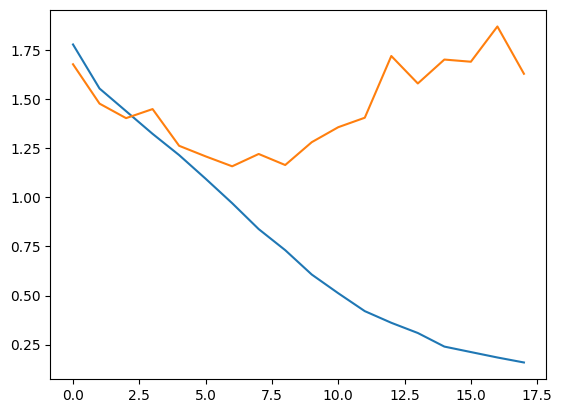

In [80]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val-loss')
plt.legend

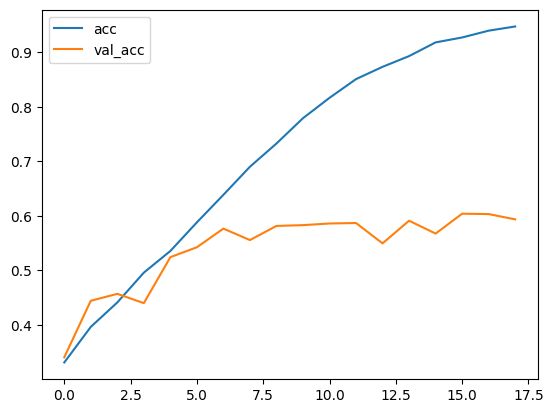

In [81]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()